# Muhammad Syafiq Prayuda
# 09011381722089
# SK 5 Palembang

# Mendeteksi Stroke Menggunakan Artificial Neural Network 

Stroke adalah kondisi yang terjadi ketika pasokan darah ke otak terganggu atau berkurang akibat penyumbatan (stroke iskemik) atau pecahnya pembuluh darah (stroke hemoragik). Tanpa darah, otak tidak akan mendapatkan asupan oksigen dan nutrisi, sehingga sel-sel pada sebagian area otak akan mati.

Ketika sebagian area otak mati, bagian tubuh yang dikendalikan oleh area otak yang rusak tidak dapat berfungsi dengan baik. Stroke adalah keadaan darurat medis karena sel otak dapat mati hanya dalam hitungan menit. Penanganan yang cepat dapat meminimalkan kerusakan otak dan kemungkinan munculnya komplikasi.

Menurut riset kesehatan dasar yang diselenggarakan oleh Kementrian Kesehatan RI pada tahun 2013, di Indonesia terdapat lebih dari 2 juta penduduk, atau 12 dari 1000 penduduk, menderita stroke dengan persentase terbesar berasal dari provinsi Sulawesi Selatan.

Selain itu, stroke juga merupakan pembunuh nomor 1 di Indonesia, lebih dari 15% kematian di Indonesia disebabkan oleh stroke. Stroke iskemik memiliki kejadian yang lebih sering dibandingkan dengan stroke hemoragik, namun stroke hemoragik membunuh lebih sering dibandingkan dengan stroke iskemik.

# Dataset

#### Disini Dataset  memiliki 8 anggota dengan 1 parameter Output
1. Gender (Jenis Kelamin 0 adalah perempuan dan 1 adalah laki-laki)
2. Age (Umur)
3. Hypertensi ( 0 = tidak dan 1 = ya)
4. Heart Disease ( 0 = tidak dan 1 = ya)
5. Work Type ( 0 = tidak pernah bekerja; 1 = Tidak Bekerja; 2 = Pekerja Pemerintahan; 3 = Pekerja Swasta; 4 = anak-anak) 
6. Avg Glucose Level (Rata - rata kadar glukosa)
7. bmi
8. Smoking( 0 = tidak pernah merokok; 1 = pernah merokok; 2 = perokok)

dataset yang digunakan menggunakan dataset yang berasal dari kaggle : https://www.kaggle.com/asaumya/healthcare-dataset-stroke-data#train_2v.csv

# 1. Import Library
Mengimport library yang digunakan.
### Library Numpy 
Fungsinya adalah untuk mengolah data dalam bentuk angka (array).
### Library Matplotlib 
Fungsinya adalah untuk visualisasi dataset dan juga memudahkan untuk dipahami.
### Library Sklearn 
Fungsinya digunakan pada tahap preprosesing untuk mengubah data menjadi format yang lebih mudah.
### Library Pandas
Fungsinya adalah untuk membaca file dataset yang bentuknya .CSV
### Library Seaborn
Fungsinya adalah untuk membantu visualisasi dataset.
### Library SMOTE
Fungsinya adalah untuk membuat data dari imbalance menjadi balance

In [31]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 2. import Dataset
Pada dataset ini mempunyai 9 kolom dan 43361 baris, 9 kolom sebagai features dan 1 kolom (target) sebagai label yang memiliki nilai 0 (tidak stroke) dan 1 (stroke) 

In [32]:
dataset=pd.read_csv("train2v3.csv", delimiter=",")
dataset.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,58.0,1,0,2,87.96,39.2,0.0,0
1,0,70.0,0,0,2,69.04,35.9,1.0,0
2,0,52.0,0,0,2,77.59,17.7,1.0,0
3,0,75.0,0,1,3,243.53,27.0,0.0,0
4,0,32.0,0,0,2,77.67,32.3,2.0,0


In [33]:
dataset.shape

(43361, 9)

# 3.Visualisasi data
Proses untuk check data apakah di dataset ini masih ada file yang kosong atau tidak

In [35]:
dataset.stroke.value_counts()

0    42579
1      782
Name: stroke, dtype: int64

Fungsi dari bagian ini adalah untuk mengetahui banyaknya persebaran data terhadap nilai 0 dan 1 

- Keterangannya yaitu jumlah yang terkena stroke adalah 42579 dan yang tidak terkena stroke adalah 782
- dikarenakan hasilnya tidak merata, maka harus di sama ratakan. Meratakan datasetnya bisa dengan menggunakan SMOTE

# 4.Check Data

Proses untuk check data apakah di dataset ini masih ada file yang kosong atau tidak

In [36]:
dataset.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
work_type                0
avg_glucose_level        0
bmi                   1459
smoking_status       13257
stroke                   0
dtype: int64

Pada bagian ini dapat dilihat bahwa data yang kosong sebanyak 14.716.

In [37]:
dataset=dataset.dropna()

Untuk menghilangkan data yang kosong dapat digunakan code diatas

In [38]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Untuk mengolah data kita harus menghilangkan nilai yang kosong agar datanya bisa diolah

# 5. Features dan Labels
Features dimulai dari stroke

In [39]:
features = dataset.iloc[:, dataset.columns != 'stroke']
labels = dataset.iloc[:, dataset.columns == 'stroke']

# 6. Normalisasi
Tahap selanjutnya adalah Normalisasi, pada normalisasi ini akan menggunakan metode Normalisasi yaitu MinMaxScaler


In [40]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# 7. Splitting dan Modelling 

Ini adalah tahap membuat test file yang berukuran 40 % dari data keseluruhan yang tersedia. Kemudian membuat hiden layer yang berjumlah 50. Setelah itu menambahkan hiden layer yang kedua yang berjumlah 50 hiden layer. Dan yang terakhir adalah membuat output layer 1 yang isinya adalah tidak terkena stroke dan terkena stroke 

In [41]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.4, shuffle=True, stratify=labels)

In [42]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

In [43]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=250, epochs=350)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 17442 samples, validate on 11629 samples
Epoch 1/350
17442/17442 [==============================] - 2s 90us/step - loss: 0.3754 - accuracy: 0.9428 - val_loss: 0.1355 - val_accuracy: 0.9812
Epoch 2/350
17442/17442 [==============================] - 1s 31us/step - loss: 0.1289 - accuracy: 0.9811 - val_loss: 0.1095 - val_accuracy: 0.9812
Epoch 3/350
17442/17442 [==============================] - 1s 35us/step - loss: 0.1135 - accuracy: 0.9811 - val_loss: 0.0998 - val_accuracy: 0.9812
Epoch 4/350
17442/17442 [==============================] - 1s 31us/step - loss: 0.1024 - accuracy: 0.9811 - val_loss: 0.0936 - val_accuracy: 0.9812
Epoch 5/350
17442/17442 [==============================] - 1s 34us/step - loss: 0.0980 - accuracy: 0.9811 - val_loss: 0.0897 - val_accuracy: 0.9812
Epoch 6/350
17442/17442 [==============================] - 1s 30us/step - loss: 0.0937 - accuracy: 0.9811 - val_loss: 0.0856 - val_accuracy: 0.9812
Epoch 7/350
17442/17442 [==============================] - 1s 

Epoch 56/350
17442/17442 [==============================] - 1s 29us/step - loss: 0.0797 - accuracy: 0.9811 - val_loss: 0.0805 - val_accuracy: 0.9812
Epoch 57/350
17442/17442 [==============================] - 1s 30us/step - loss: 0.0792 - accuracy: 0.9811 - val_loss: 0.0803 - val_accuracy: 0.9812
Epoch 58/350
17442/17442 [==============================] - 1s 34us/step - loss: 0.0811 - accuracy: 0.9811 - val_loss: 0.0803 - val_accuracy: 0.9812
Epoch 59/350
17442/17442 [==============================] - 1s 39us/step - loss: 0.0805 - accuracy: 0.9811 - val_loss: 0.0810 - val_accuracy: 0.9812
Epoch 60/350
17442/17442 [==============================] - 1s 45us/step - loss: 0.0801 - accuracy: 0.9811 - val_loss: 0.0805 - val_accuracy: 0.9812
Epoch 61/350
17442/17442 [==============================] - 1s 76us/step - loss: 0.0808 - accuracy: 0.9811 - val_loss: 0.0801 - val_accuracy: 0.9812
Epoch 62/350
17442/17442 [==============================] - 1s 30us/step - loss: 0.0806 - accuracy: 0.9811

Epoch 111/350
17442/17442 [==============================] - 1s 29us/step - loss: 0.0779 - accuracy: 0.9811 - val_loss: 0.0804 - val_accuracy: 0.9812
Epoch 112/350
17442/17442 [==============================] - 1s 32us/step - loss: 0.0770 - accuracy: 0.9811 - val_loss: 0.0804 - val_accuracy: 0.9812
Epoch 113/350
17442/17442 [==============================] - 1s 36us/step - loss: 0.0777 - accuracy: 0.9811 - val_loss: 0.0807 - val_accuracy: 0.9812
Epoch 114/350
17442/17442 [==============================] - 1s 38us/step - loss: 0.0776 - accuracy: 0.9811 - val_loss: 0.0804 - val_accuracy: 0.9812
Epoch 115/350
17442/17442 [==============================] - 1s 37us/step - loss: 0.0767 - accuracy: 0.9811 - val_loss: 0.0808 - val_accuracy: 0.9812
Epoch 116/350
17442/17442 [==============================] - 1s 30us/step - loss: 0.0778 - accuracy: 0.9811 - val_loss: 0.0804 - val_accuracy: 0.9812
Epoch 117/350
17442/17442 [==============================] - 1s 30us/step - loss: 0.0772 - accuracy:

Epoch 220/350
17442/17442 [==============================] - 0s 27us/step - loss: 0.0751 - accuracy: 0.9812 - val_loss: 0.0815 - val_accuracy: 0.9809
Epoch 221/350
17442/17442 [==============================] - 0s 26us/step - loss: 0.0744 - accuracy: 0.9812 - val_loss: 0.0815 - val_accuracy: 0.9812
Epoch 222/350
17442/17442 [==============================] - 0s 27us/step - loss: 0.0749 - accuracy: 0.9814 - val_loss: 0.0817 - val_accuracy: 0.9811
Epoch 223/350
17442/17442 [==============================] - 0s 25us/step - loss: 0.0748 - accuracy: 0.9812 - val_loss: 0.0815 - val_accuracy: 0.9811
Epoch 224/350
17442/17442 [==============================] - 1s 31us/step - loss: 0.0749 - accuracy: 0.9813 - val_loss: 0.0817 - val_accuracy: 0.9812
Epoch 225/350
17442/17442 [==============================] - 1s 35us/step - loss: 0.0746 - accuracy: 0.9813 - val_loss: 0.0821 - val_accuracy: 0.9812
Epoch 226/350
17442/17442 [==============================] - 1s 31us/step - loss: 0.0742 - accuracy:

Epoch 329/350
17442/17442 [==============================] - 0s 27us/step - loss: 0.0726 - accuracy: 0.9813 - val_loss: 0.0831 - val_accuracy: 0.9809
Epoch 330/350
17442/17442 [==============================] - 0s 26us/step - loss: 0.0728 - accuracy: 0.9814 - val_loss: 0.0834 - val_accuracy: 0.9807
Epoch 331/350
17442/17442 [==============================] - 0s 28us/step - loss: 0.0727 - accuracy: 0.9810 - val_loss: 0.0829 - val_accuracy: 0.9809
Epoch 332/350
17442/17442 [==============================] - 0s 26us/step - loss: 0.0728 - accuracy: 0.9816 - val_loss: 0.0830 - val_accuracy: 0.9811
Epoch 333/350
17442/17442 [==============================] - 0s 26us/step - loss: 0.0732 - accuracy: 0.9814 - val_loss: 0.0833 - val_accuracy: 0.9809
Epoch 334/350
17442/17442 [==============================] - 0s 26us/step - loss: 0.0726 - accuracy: 0.9814 - val_loss: 0.0834 - val_accuracy: 0.9808
Epoch 335/350
17442/17442 [==============================] - 0s 25us/step - loss: 0.0721 - accuracy:

In [44]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.980823814868927


In [45]:
acc_training.history

{'val_loss': [0.13546931376634763,
  0.10945169055914979,
  0.09981727778017188,
  0.09362121732175602,
  0.08965631612641495,
  0.0855961922773676,
  0.08329862249190732,
  0.08218426460502574,
  0.08124610258130023,
  0.08059549450769256,
  0.08047816862964612,
  0.08080303361476805,
  0.08010080843261803,
  0.08003531391199421,
  0.08000618517296323,
  0.08011480071587906,
  0.08052154310526222,
  0.07998706442135374,
  0.080135712262811,
  0.07980561172157995,
  0.08019654433067508,
  0.07971835639290925,
  0.08017158537996749,
  0.07985936847970855,
  0.07963171772263519,
  0.0798858726346382,
  0.07995724111445608,
  0.08018017687868996,
  0.07998010631651006,
  0.07985885036643635,
  0.080089946726483,
  0.08154563352040212,
  0.08002410751832086,
  0.08004186951249943,
  0.07999723026895268,
  0.08050668196346951,
  0.07995234955650316,
  0.08030832428297753,
  0.08013824274977616,
  0.08037609427107642,
  0.08016340638226496,
  0.08016090311340027,
  0.08019450124488035,
  0.0

# 8. Plotting Model Akurasi dan Loss Akurasi

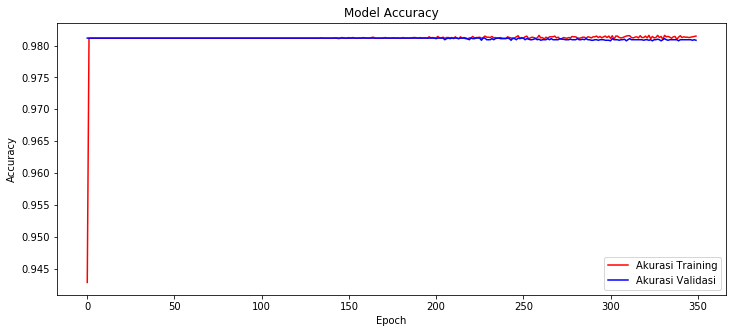

In [46]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

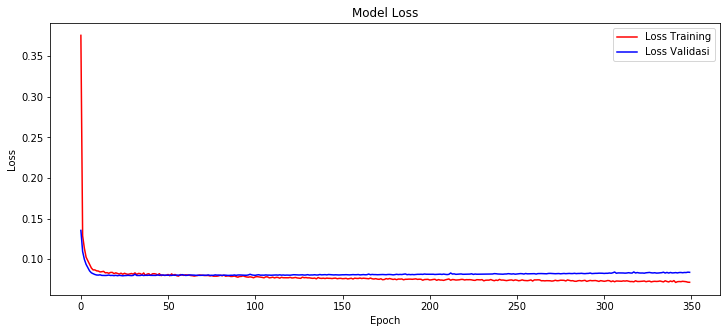

In [47]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

# SMOTE

Pada tahap inilah menggunakan SMOTE. Fungsi dari SMOTE ini adalah untuk membuat data dari imbalance menjadi balance

In [48]:
features_resample, labels_resample = SMOTE().fit_sample(features,labels.values.ravel())
labels_resample = pd.DataFrame(labels_resample)
features_resample = pd.DataFrame(features_resample)
features_train, features_test, labels_train, labels_test = train_test_split(features_resample,labels_resample,test_size=0.25)
features_train = np.array(features_train)
features_test = np.array(features_test)
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
acc_training = model.fit(features_train, labels_train, validation_data=(features_test, labels_test), batch_size=250, epochs=350)
acc_testing  = model.evaluate(features_test, labels_test)

Train on 42784 samples, validate on 14262 samples
Epoch 1/350
42784/42784 [==============================] - 2s 52us/step - loss: 0.6884 - accuracy: 0.6789 - val_loss: 0.4685 - val_accuracy: 0.7806
Epoch 2/350
42784/42784 [==============================] - 2s 36us/step - loss: 0.5394 - accuracy: 0.7363 - val_loss: 0.4513 - val_accuracy: 0.7945
Epoch 3/350
42784/42784 [==============================] - 2s 47us/step - loss: 0.5188 - accuracy: 0.7426 - val_loss: 0.4410 - val_accuracy: 0.7936
Epoch 4/350
42784/42784 [==============================] - 1s 29us/step - loss: 0.5052 - accuracy: 0.7500 - val_loss: 0.4339 - val_accuracy: 0.7989
Epoch 5/350
42784/42784 [==============================] - 1s 29us/step - loss: 0.4976 - accuracy: 0.7538 - val_loss: 0.4302 - val_accuracy: 0.8009
Epoch 6/350
42784/42784 [==============================] - 1s 29us/step - loss: 0.4893 - accuracy: 0.7597 - val_loss: 0.4253 - val_accuracy: 0.8063
Epoch 7/350
42784/42784 [==============================] - 1s 

Epoch 56/350
42784/42784 [==============================] - 1s 28us/step - loss: 0.3746 - accuracy: 0.8329 - val_loss: 0.3601 - val_accuracy: 0.8373
Epoch 57/350
42784/42784 [==============================] - 1s 30us/step - loss: 0.3738 - accuracy: 0.8329 - val_loss: 0.3553 - val_accuracy: 0.8434
Epoch 58/350
42784/42784 [==============================] - 2s 48us/step - loss: 0.3718 - accuracy: 0.8324 - val_loss: 0.3555 - val_accuracy: 0.8417
Epoch 59/350
42784/42784 [==============================] - 1s 31us/step - loss: 0.3729 - accuracy: 0.8329 - val_loss: 0.3641 - val_accuracy: 0.8350
Epoch 60/350
42784/42784 [==============================] - 1s 29us/step - loss: 0.3706 - accuracy: 0.8345 - val_loss: 0.3542 - val_accuracy: 0.8436
Epoch 61/350
42784/42784 [==============================] - 1s 29us/step - loss: 0.3689 - accuracy: 0.8343 - val_loss: 0.3541 - val_accuracy: 0.8420
Epoch 62/350
42784/42784 [==============================] - 1s 29us/step - loss: 0.3672 - accuracy: 0.8358

Epoch 111/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3392 - accuracy: 0.8492 - val_loss: 0.3241 - val_accuracy: 0.8567
Epoch 112/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3374 - accuracy: 0.8504 - val_loss: 0.3227 - val_accuracy: 0.8591
Epoch 113/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3385 - accuracy: 0.8497 - val_loss: 0.3255 - val_accuracy: 0.8576
Epoch 114/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3383 - accuracy: 0.8502 - val_loss: 0.3275 - val_accuracy: 0.8566
Epoch 115/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3363 - accuracy: 0.8510 - val_loss: 0.3262 - val_accuracy: 0.8565
Epoch 116/350
42784/42784 [==============================] - 1s 27us/step - loss: 0.3371 - accuracy: 0.8495 - val_loss: 0.3190 - val_accuracy: 0.8631
Epoch 117/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3347 - accuracy:

Epoch 220/350
42784/42784 [==============================] - 1s 27us/step - loss: 0.3078 - accuracy: 0.8669 - val_loss: 0.2902 - val_accuracy: 0.8780
Epoch 221/350
42784/42784 [==============================] - 1s 27us/step - loss: 0.3102 - accuracy: 0.8636 - val_loss: 0.2892 - val_accuracy: 0.8773
Epoch 222/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3100 - accuracy: 0.8657 - val_loss: 0.2913 - val_accuracy: 0.8786
Epoch 223/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3079 - accuracy: 0.8662 - val_loss: 0.3063 - val_accuracy: 0.8690
Epoch 224/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.3090 - accuracy: 0.8649 - val_loss: 0.2903 - val_accuracy: 0.8782
Epoch 225/350
42784/42784 [==============================] - 1s 27us/step - loss: 0.3059 - accuracy: 0.8670 - val_loss: 0.2908 - val_accuracy: 0.8774
Epoch 226/350
42784/42784 [==============================] - 1s 27us/step - loss: 0.3063 - accuracy:

Epoch 329/350
42784/42784 [==============================] - 2s 48us/step - loss: 0.2943 - accuracy: 0.8726 - val_loss: 0.2800 - val_accuracy: 0.8851
Epoch 330/350
42784/42784 [==============================] - 1s 27us/step - loss: 0.2954 - accuracy: 0.8723 - val_loss: 0.2779 - val_accuracy: 0.8849
Epoch 331/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.2906 - accuracy: 0.8750 - val_loss: 0.2755 - val_accuracy: 0.8863
Epoch 332/350
42784/42784 [==============================] - 1s 27us/step - loss: 0.2909 - accuracy: 0.8736 - val_loss: 0.2773 - val_accuracy: 0.8862
Epoch 333/350
42784/42784 [==============================] - 1s 26us/step - loss: 0.2961 - accuracy: 0.8718 - val_loss: 0.2745 - val_accuracy: 0.8878
Epoch 334/350
42784/42784 [==============================] - 1s 28us/step - loss: 0.2919 - accuracy: 0.8732 - val_loss: 0.2736 - val_accuracy: 0.8881
Epoch 335/350
42784/42784 [==============================] - 1s 28us/step - loss: 0.2924 - accuracy:

In [49]:
print('akurasinya adalah {}'.format(acc_testing[1]))

akurasinya adalah 0.8855700492858887


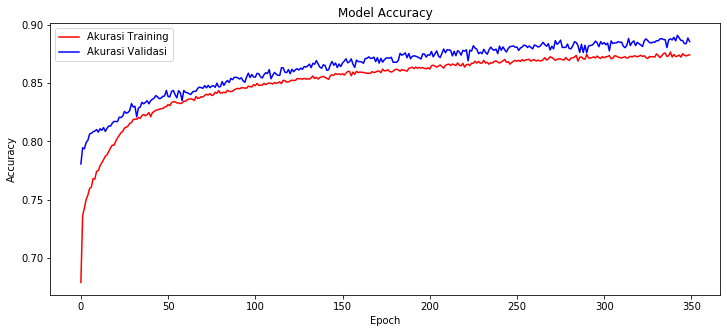

In [50]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

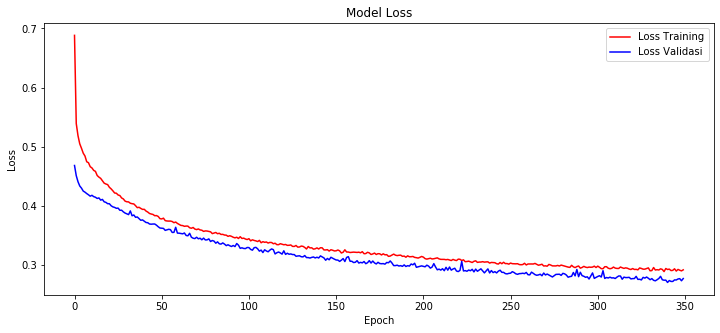

In [51]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [52]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [53]:
training_predicted.round()

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

# 9. Confusion Matriks

Confusion matrix adalah metode yang biasa digunakan untuk melakukan perhitungan akurasi pada konsep data mining atau sistem Pendukung Keputusan. Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif.



- Recall adalah proporsi kasus positif yang diidentifikasi dengan benar.
   Rumus dari recall = d/(c+d)
- Precision adalah proporsi kasus dengan hasil positif yang benar.
   Rumus dari Precision = d/(b+d)
- Accuracy adalah perbandingan kasus yang diidentifikasi benar dengan jumlah semua kasus
   Rumus dari accuracy= (a+c)/(a+b+c+d)
- Error Rate adalah kasus yang diidentifikasi salah dengan sejumlah semua kasus
   Rumus dari Error Rate = (b+c)/(a+b+c+d)



Keterangan:
- Jika hasil prediksi negatif dan data sebenarnya negatif.
- Jika hasil prediksi positif sedangkan nilai sebenarnya negatif.
- Jika hasil prediksi negatif sedangkan nilai sebenarnya positif.
- Jika hasil prediksi positif dan nilai sebenarnya positif.

In [54]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [55]:
training_cm

array([[13983,  3130],
       [   29,   300]], dtype=int64)

In [56]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.8188854489164087
Specificity training 0.9118541033434651
Sensitivity training 0.8170981125460176
Precision training 0.9979303454182129
F1 Score training 0.8985060240963855


In [57]:
testing_cm

array([[9307, 2103],
       [  24,  195]], dtype=int64)

In [58]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.8170951930518531
Specificity testing 0.8904109589041096
Sensitivity testing 0.8156879929886065
Precision testing 0.9974279284106741
F1 Score testing 0.8974494961670122
